In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
def compute_attribution_auc(attribution_df, random = False):
    
    #Computed as 1 - #changes needed/Max #changes needed 
    #Where a change is a swap of adjacent rows and we would like to change the df so that all
    #of the binding atoms are at the top
    
    #Thus if all of the binding atoms are ranked at the top the score will be 1 and if they are all placed
    #at the bottom they will be 0
    
    
    #Obtain ranks of binding atoms and number of binding atoms
    
    if random:
        attribution_df['attribution'] = np.random.uniform(size = attribution_df.shape[0])
        attribution_df = attribution_df.sort_values('attribution', ascending = True).reset_index(drop = True)
    
    num_binding_atoms = int(attribution_df['binding'].sum())
    
    binding_atom_ranks = []
    
    for idx, row in attribution_df.iterrows():
        
        if row['binding'] == 1:
            binding_atom_ranks.append(idx + 1)
            
            
    num_changes_needed = sum(binding_atom_ranks) - sum(list(range(num_binding_atoms + 1)))
    max_num_changes = num_binding_atoms*(attribution_df.shape[0] - num_binding_atoms)
    
    attribution_auc = 1 - num_changes_needed/max_num_changes
    
    return attribution_auc
    
    
def get_histogram_list(df_list):
    
    #find the rank of the highest ranked active atom in each case and plot in a histogram
    
    highest_rank = []
    
    for df_loc in df_list:
        df = pd.read_csv(df_loc, sep = ' ')
        highest_rank.append(np.argmax(list(df['binding'])) + 1)
        
    return highest_rank
    
    
    
    
    

In [59]:
all_dfs = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs/df*.csv')

In [60]:
all_attribution_scores = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs] 

In [61]:
np.mean(all_attribution_scores)

0.8541252818611393

(array([   0., 1591.,  369.,  150.,   83.,   67.,   52.,   34.,   26.,
          31.,   11.,   12.,   16.,   13.,   13.,   10.,   11.,    6.,
           5.,   10.,    3.,    5.,    8.,   16.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Patch objects>)

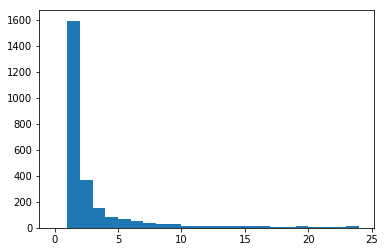

In [28]:
plt.hist(get_histogram_list(all_dfs), np.arange(25))

(array([  59.,   44.,   40.,   42.,   59.,  122.,  110.,  147.,  251.,
        1724.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

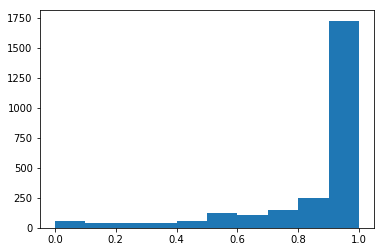

In [10]:
plt.hist(all_attribution_scores)

In [17]:
all_dfs_src = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_DUDE_SRC/df*.csv')
all_attribution_scores_src = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_src] 

In [18]:
np.mean(all_attribution_scores_src)

0.6900880316997401

In [13]:
all_attribution_scores_src

[0.5869565217391304,
 1.0,
 0.8461538461538461,
 0.0,
 0.0,
 0.5294117647058824,
 1.0,
 0.9117647058823529,
 0.8958333333333334,
 0.9137931034482758,
 0.9487179487179487,
 0.8529411764705882,
 0.9,
 0.21621621621621623,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.7065217391304348,
 0.045454545454545414,
 0.7857142857142857,
 0.6764705882352942,
 0.59375,
 0.8867924528301887,
 0.5,
 0.9875,
 1.0,
 0.9722222222222222,
 0.5681818181818181,
 0.5208333333333333,
 0.33333333333333337,
 0.5172413793103448,
 1.0,
 1.0,
 0.7796610169491526,
 1.0,
 1.0,
 1.0,
 0.9767441860465116,
 0.5,
 1.0,
 0.3563218390804598,
 0.0625,
 0.7647058823529411,
 0.9215686274509804,
 0.9583333333333334,
 1.0,
 0.8103448275862069,
 1.0,
 0.9827586206896551,
 0.375,
 0.06666666666666665,
 1.0,
 0.10256410256410253,
 1.0,
 0.8648648648648649,
 1.0,
 0.5625,
 0.5119047619047619,
 0.7543859649122807,
 1.0,
 0.4852941176470589,
 0.9333333333333333,
 0.0,
 0.09375,
 0.8636363636363636,
 1.0,
 1.0,
 1.0,
 0.4242424242424242,


(array([  0., 958., 345., 188., 137.,  83.,  75.,  57.,  58.,  44.,  29.,
         39.,  26.,  34.,  19.,  26.,  37.,  34.,  20.,  24.,  29.,  24.,
         23.,  35.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Patch objects>)

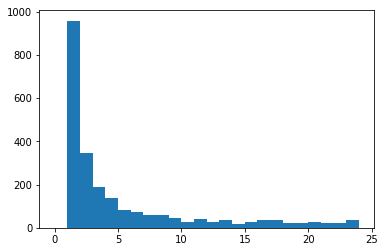

In [14]:
plt.hist(get_histogram_list(all_dfs_src), np.arange(25))

In [31]:
top_ranked = get_histogram_list(all_dfs)

In [32]:
top_ranked_src = get_histogram_list(all_dfs_src)

In [33]:
sum(pd.Series(top_ranked) <= 1)/len(top_ranked)

0.6123941493456505

In [34]:
sum(pd.Series(top_ranked_src) <= 1)/len(top_ranked_src)

0.3687451886066205

In [35]:
top_ranked_cumulative = []
top_ranked_cumulative_src = []


for i in range(1, 21):
    top_ranked_cumulative.append(sum(pd.Series(top_ranked) <= i)/len(top_ranked))
    top_ranked_cumulative_src.append(sum(pd.Series(top_ranked_src) <= i)/len(top_ranked_src))

In [15]:
all_dfs_aa2ar = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_DUDE_AA2AR/df*.csv')
all_attribution_scores_aa2ar = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_aa2ar] 

In [16]:
np.mean(all_attribution_scores_aa2ar)

0.7230576086213967

In [39]:
top_ranked_aa2ar = get_histogram_list(all_dfs_aa2ar)

In [40]:
sum(pd.Series(top_ranked_aa2ar) <= 1)/len(top_ranked_aa2ar)

0.4314857582755966

In [41]:
top_ranked_cumulative = []
top_ranked_cumulative_src = []
top_ranked_cumulative_aa2ar = []


for i in range(1, 21):
    top_ranked_cumulative.append(sum(pd.Series(top_ranked) <= i)/len(top_ranked))
    top_ranked_cumulative_src.append(sum(pd.Series(top_ranked_src) <= i)/len(top_ranked_src))
    top_ranked_cumulative_aa2ar.append(sum(pd.Series(top_ranked_aa2ar) <= i)/len(top_ranked_aa2ar))

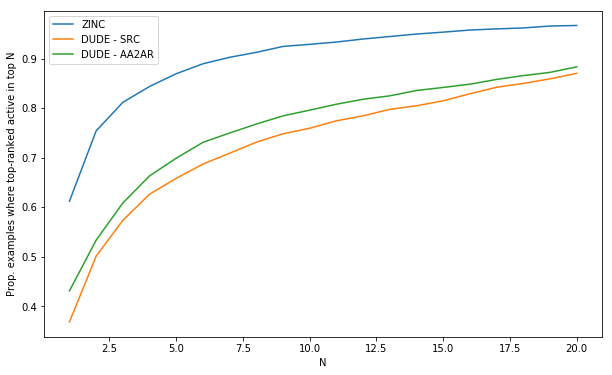

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,21), top_ranked_cumulative, label = 'ZINC')
plt.plot(range(1,21), top_ranked_cumulative_src, label = 'DUDE - SRC')
plt.plot(range(1,21), top_ranked_cumulative_aa2ar, label = 'DUDE - AA2AR')

plt.xlabel('N')
plt.ylabel('Prop. examples where top-ranked active in top N')


plt.legend()
plt.show()

# Effect of noise

In [49]:
all_dfs_nonoise = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_no_noise/df*.csv')
all_attribution_scores_nonoise = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_nonoise] 

all_dfs_5noise = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_noise_5/df*.csv')
all_attribution_scores_5noise = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_5noise] 

all_dfs_10noise = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_noise_10/df*.csv')
all_attribution_scores_10noise = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_10noise] 

all_dfs_15noise = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_noise_15/df*.csv')
all_attribution_scores_15noise = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_15noise] 



In [50]:
top_ranked_nonoise = get_histogram_list(all_dfs_nonoise)
top_ranked_5noise = get_histogram_list(all_dfs_5noise)
top_ranked_10noise = get_histogram_list(all_dfs_10noise)
top_ranked_15noise = get_histogram_list(all_dfs_15noise)

In [52]:
np.mean(np.array([all_attribution_scores_nonoise, all_attribution_scores_5noise, all_attribution_scores_10noise, all_attribution_scores_15noise]),axis=1)


array([0.89645024, 0.8839126 , 0.86551253, 0.86902807])

In [53]:
top_ranked_cumulative_nonoise = []
top_ranked_cumulative_5noise = []
top_ranked_cumulative_10noise = []
top_ranked_cumulative_15noise = []

for i in range(1, 21):
    
    top_ranked_cumulative_nonoise.append(sum(pd.Series(top_ranked_nonoise) <= i)/len(top_ranked_nonoise))
    top_ranked_cumulative_5noise.append(sum(pd.Series(top_ranked_5noise) <= i)/len(top_ranked_5noise))
    top_ranked_cumulative_10noise.append(sum(pd.Series(top_ranked_10noise) <= i)/len(top_ranked_10noise))
    top_ranked_cumulative_15noise.append(sum(pd.Series(top_ranked_15noise) <= i)/len(top_ranked_15noise))
    
    
   

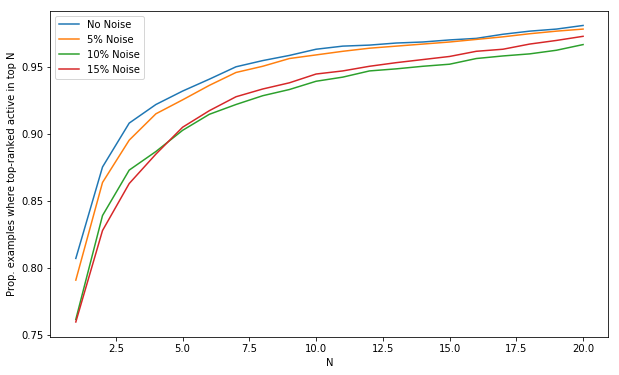

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,21), top_ranked_cumulative_nonoise, label = 'No Noise')
plt.plot(range(1,21), top_ranked_cumulative_5noise, label = '5% Noise')
plt.plot(range(1,21), top_ranked_cumulative_10noise, label = '10% Noise')
plt.plot(range(1,21), top_ranked_cumulative_15noise, label = '15% Noise')

plt.xlabel('N')
plt.ylabel('Prop. examples where top-ranked active in top N')


plt.legend()
plt.show()

In [3]:
def process_attribution_scores(path_to_attribution_dir):
    
    all_dfs = glob.glob(f'{path_to_attribution_dir}/df*.csv')
    all_attribution_scores = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs]
    top_ranked = get_histogram_list(all_dfs)
    
    top_ranked_cumulative = []
    

    for i in range(1, 21):
        top_ranked_cumulative.append(sum(pd.Series(top_ranked) <= i)/len(top_ranked))

    return np.mean(all_attribution_scores), all_attribution_scores, top_ranked, top_ranked_cumulative


# Showing that altering the PLEC cutoff ruins the attribution performance

In [5]:
root_dir = '/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set'
ZINC_scores = {}
suffixes = ['pc4', 'pc45', 'pc5']

for suffix in suffixes:
    print(f'Suffix: {suffix}')
    ZINC_scores[f'{suffix}'] = process_attribution_scores(f'{root_dir}/attribution_dfs_zinc_{suffix}')


mean_attribution_scores_ZINC = [ZINC_scores[f'{suffix}'][0] for suffix in suffixes]


Suffix: pc4
Suffix: pc45
Suffix: pc5


In [6]:
print(mean_attribution_scores_ZINC)

[0.8946714631682489, 0.8552578303845499, 0.8025598702561171]


In [7]:
root_dir = '/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set'
DUDE_scores = {}
targets = ['AA2AR', 'DRD3', 'FA10', 'MK14', 'VGFR2']
suffixes = ['', '_pc45', '_pc5']
for target in targets:
    print(target)
    for suffix in suffixes:
        print(f'Suffix: {suffix}')
        DUDE_scores[f'{target}{suffix}'] = process_attribution_scores(f'{root_dir}/attribution_dfs_DUDE_{target}{suffix}')


        

AA2AR
Suffix: 
Suffix: _pc45
Suffix: _pc5
DRD3
Suffix: 
Suffix: _pc45
Suffix: _pc5
FA10
Suffix: 
Suffix: _pc45
Suffix: _pc5
MK14
Suffix: 
Suffix: _pc45
Suffix: _pc5
VGFR2
Suffix: 
Suffix: _pc45
Suffix: _pc5


In [8]:
mean_attribution_scores_DUDE = {}
for target in targets:
    mean_attribution_scores_DUDE[target] = [DUDE_scores[f'{target}{suffix}'][0] for suffix in suffixes]

attribution_curves_DUDE = {}
for target in targets:
    attribution_curves_DUDE[target] = DUDE_scores[f'{target}_pc45'][3]


In [9]:
mean_attribution_scores_DUDE

{'AA2AR': [0.8821552812311382, 0.7343341427443302, 0.6620610458203666],
 'DRD3': [0.8403409526513137, 0.700300378512041, 0.6292649819221577],
 'FA10': [0.8824562535063714, 0.7033422452034706, 0.5992177566975253],
 'MK14': [0.8345427943476933, 0.630486467364446, 0.5924852108810378],
 'VGFR2': [0.8001280696908477, 0.6378212632039576, 0.5671921200618403]}

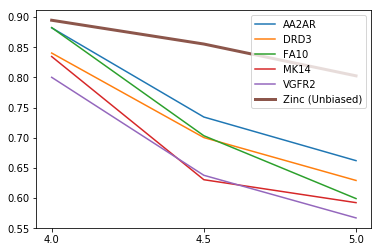

In [20]:
for target in targets:
    plt.plot([4, 4.5, 5], mean_attribution_scores_DUDE[target], label = target)

plt.plot([4, 4.5, 5], mean_attribution_scores_ZINC, label = 'Zinc (Unbiased)', linewidth = 3)

plt.xticks([4, 4.5, 5])
plt.legend()
plt.show()

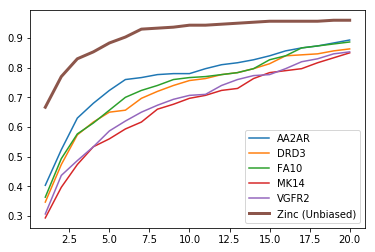

In [27]:
for target in targets:
    plt.plot(range(1,21), attribution_curves_DUDE[target], label = target)

plt.plot(range(1,21), ZINC_scores['pc45'][3], label = 'Zinc (Unbiased)', linewidth = 3)
plt.legend()
plt.show()


ALDH1
Suffix: 
Suffix: _pc45
Suffix: _pc5
FEN1
Suffix: 
Suffix: _pc45
Suffix: _pc5
MAPK1
Suffix: 
Suffix: _pc45
Suffix: _pc5
PKM2
Suffix: 
Suffix: _pc45
Suffix: _pc5
VDR
Suffix: 
Suffix: _pc45
Suffix: _pc5


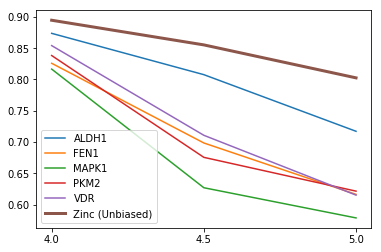

In [21]:
root_dir = '/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set'
LIT_scores = {}
targets_LIT = ['ALDH1', 'FEN1', 'MAPK1', 'PKM2', 'VDR']
suffixes = ['', '_pc45', '_pc5']
for target in targets_LIT:
    print(target)
    for suffix in suffixes:
        print(f'Suffix: {suffix}')
        LIT_scores[f'{target}{suffix}'] = process_attribution_scores(f'{root_dir}/attribution_dfs_LIT_{target}{suffix}')

mean_attribution_scores_LIT = {}
for target in targets_LIT:
    mean_attribution_scores_LIT[target] = [LIT_scores[f'{target}{suffix}'][0] for suffix in suffixes]

for target in targets_LIT:
    plt.plot([4, 4.5, 5], mean_attribution_scores_LIT[target], label = target)

    
plt.plot([4, 4.5, 5], mean_attribution_scores_ZINC, label = 'Zinc (Unbiased)', linewidth = 3)

    
plt.xticks([4, 4.5, 5])
plt.legend()
plt.show()

In [28]:
attribution_curves_LIT = {}
for target in targets_LIT:
    attribution_curves_LIT[target] = LIT_scores[f'{target}_pc45'][3]


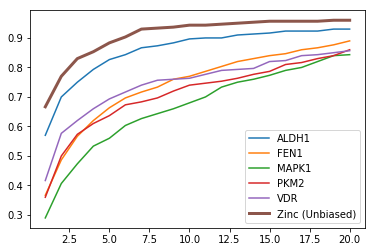

In [29]:
for target in targets_LIT:
    plt.plot(range(1,21), attribution_curves_LIT[target], label = target)

plt.plot(range(1,21), ZINC_scores['pc45'][3], label = 'Zinc (Unbiased)', linewidth = 3)
plt.legend()
plt.show()

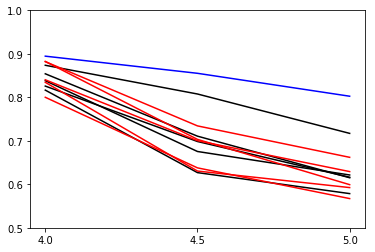

In [13]:
plt.plot([4, 4.5, 5], mean_attribution_scores_ZINC, color = 'blue')

for target in targets_LIT:
    plt.plot([4, 4.5, 5], mean_attribution_scores_LIT[target], color = 'black')

    
for target in targets:
    plt.plot([4, 4.5, 5], mean_attribution_scores_DUDE[target], color = 'red')
    
plt.xticks([4, 4.5, 5])
plt.ylim((0.5,1))
plt.show()

# Showing that the attribution performance is worse on imbalanced datasets




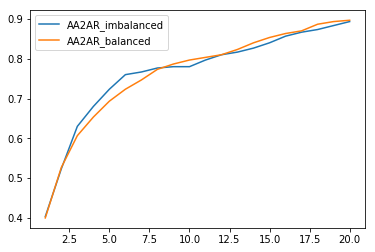

In [20]:
targets_DUDE = ['AA2AR', 'DRD3', 'FA10', 'MK14', 'VGFR2']
root_dir = '/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set'


DUDE_scores_balance_test = {}
for target in targets_DUDE:
    DUDE_scores_balance_test[f'{target}_imbalanced'] = process_attribution_scores(f'{root_dir}/attribution_dfs_DUDE_{target}_pc45')
    DUDE_scores_balance_test[f'{target}_balanced'] = process_attribution_scores(f'{root_dir}/attribution_dfs_DUDE_{target}_pc45_balanced')
    
plt.plot(range(1,21), DUDE_scores_balance_test['AA2AR_imbalanced'][3], label = 'AA2AR_imbalanced')
plt.plot(range(1,21), DUDE_scores_balance_test['AA2AR_balanced'][3], label = 'AA2AR_balanced')

plt.legend()


In [24]:
targets_LIT = ['ALDH1', 'FEN1', 'MAPK1', 'PKM2', 'VDR']
root_dir = '/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set'


LIT_scores_balance_test = {}
for target in targets_LIT:
    LIT_scores_balance_test[f'{target}_imbalanced'] = process_attribution_scores(f'{root_dir}/attribution_dfs_LIT_{target}_pc45')
    LIT_scores_balance_test[f'{target}_balanced'] = process_attribution_scores(f'{root_dir}/attribution_dfs_LIT_{target}_pc45_balanced')
    

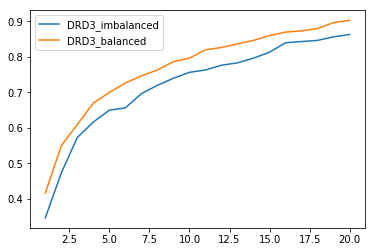

In [22]:
plt.plot(range(1,21), DUDE_scores_balance_test['DRD3_imbalanced'][3], label = 'DRD3_imbalanced')
plt.plot(range(1,21), DUDE_scores_balance_test['DRD3_balanced'][3], label = 'DRD3_balanced')
plt.legend()

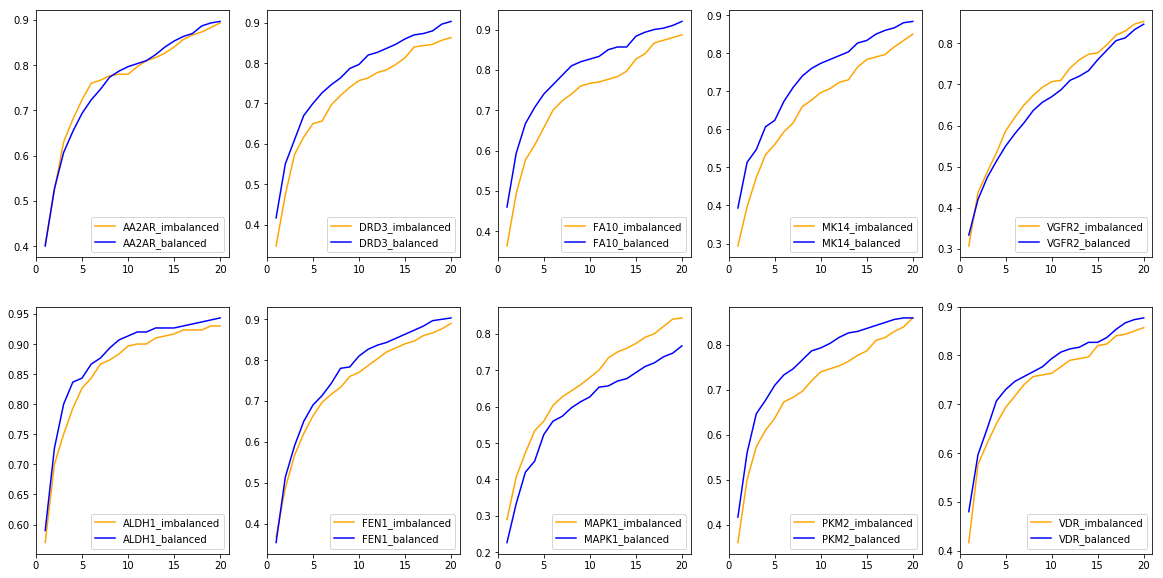

In [50]:

fig, ax = plt.subplots(2, 5, figsize=(20,10))

#DUDE

ax[0, 0].plot(range(1,21), DUDE_scores_balance_test['AA2AR_imbalanced'][3], label = 'AA2AR_imbalanced', color = 'orange')  
ax[0, 0].plot(range(1,21), DUDE_scores_balance_test['AA2AR_balanced'][3], label = 'AA2AR_balanced', color = 'blue')
ax[0, 0].legend(loc="lower right")

ax[0, 1].plot(range(1,21), DUDE_scores_balance_test['DRD3_imbalanced'][3], label = 'DRD3_imbalanced', color = 'orange') 
ax[0, 1].plot(range(1,21), DUDE_scores_balance_test['DRD3_balanced'][3], label = 'DRD3_balanced', color = 'blue') 
ax[0, 1].legend(loc="lower right")

ax[0, 2].plot(range(1,21), DUDE_scores_balance_test['FA10_imbalanced'][3], label = 'FA10_imbalanced', color = 'orange') 
ax[0, 2].plot(range(1,21), DUDE_scores_balance_test['FA10_balanced'][3], label = 'FA10_balanced', color = 'blue')
ax[0, 2].legend(loc="lower right")

ax[0, 3].plot(range(1,21), DUDE_scores_balance_test['MK14_imbalanced'][3], label = 'MK14_imbalanced', color = 'orange') 
ax[0, 3].plot(range(1,21), DUDE_scores_balance_test['MK14_balanced'][3], label = 'MK14_balanced', color = 'blue')
ax[0, 3].legend(loc="lower right")

ax[0, 4].plot(range(1,21), DUDE_scores_balance_test['VGFR2_imbalanced'][3], label = 'VGFR2_imbalanced', color = 'orange') 
ax[0, 4].plot(range(1,21), DUDE_scores_balance_test['VGFR2_balanced'][3], label = 'VGFR2_balanced', color = 'blue') 
ax[0, 4].legend(loc="lower right")

#LIT_PCBA

ax[1, 0].plot(range(1,21), LIT_scores_balance_test['ALDH1_imbalanced'][3], label = 'ALDH1_imbalanced', color = 'orange')  
ax[1, 0].plot(range(1,21), LIT_scores_balance_test['ALDH1_balanced'][3], label = 'ALDH1_balanced', color = 'blue')
ax[1, 0].legend(loc="lower right")

ax[1, 1].plot(range(1,21), LIT_scores_balance_test['FEN1_imbalanced'][3], label = 'FEN1_imbalanced', color = 'orange') 
ax[1, 1].plot(range(1,21), LIT_scores_balance_test['FEN1_balanced'][3], label = 'FEN1_balanced', color = 'blue') 
ax[1, 1].legend(loc="lower right")

ax[1, 2].plot(range(1,21), LIT_scores_balance_test['MAPK1_imbalanced'][3], label = 'MAPK1_imbalanced', color = 'orange') 
ax[1, 2].plot(range(1,21), LIT_scores_balance_test['MAPK1_balanced'][3], label = 'MAPK1_balanced', color = 'blue')
ax[1, 2].legend(loc="lower right")

ax[1, 3].plot(range(1,21), LIT_scores_balance_test['PKM2_imbalanced'][3], label = 'PKM2_imbalanced', color = 'orange') 
ax[1, 3].plot(range(1,21), LIT_scores_balance_test['PKM2_balanced'][3], label = 'PKM2_balanced', color = 'blue')
ax[1, 3].legend(loc="lower right")

ax[1, 4].plot(range(1,21), LIT_scores_balance_test['VDR_imbalanced'][3], label = 'VDR_imbalanced', color = 'orange') 
ax[1, 4].plot(range(1,21), LIT_scores_balance_test['VDR_balanced'][3], label = 'VDR_balanced', color = 'blue') 
ax[1, 4].legend(loc="lower right")

plt.show()

In [3]:
AA2AR_output_4 = process_attribution_scores('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_DUDE_AA2AR_new')
AA2AR_output_45 = process_attribution_scores('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_DUDE_AA2AR_pc45/')
AA2AR_output_5 = process_attribution_scores('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_DUDE_AA2AR_pc5/')

DRD3_output_4 = process_attribution_scores('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_DUDE_DRD3/')
DRD3_output_45 = process_attribution_scores('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_DUDE_DRD3_pc45/')
DRD3_output_5 = process_attribution_scores('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_DUDE_DRD3_pc5/')


NameError: name 'process_attribution_scores' is not defined

In [12]:
ALDH1_output_4 = process_attribution_scores('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_LIT_ALDH1')
ALDH1_output_45 = process_attribution_scores('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_LIT_ALDH1_pc45/')
ALDH1_output_5 = process_attribution_scores('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_LIT_ALDH1_pc5/')

FEN1_output_4 = process_attribution_scores('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_LIT_FEN1/')
FEN1_output_45 = process_attribution_scores('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_LIT_FEN1_pc45/')
FEN1_output_5 = process_attribution_scores('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_LIT_FEN1_pc5/')



In [13]:
print(AA2AR_output_4[0], AA2AR_output_45[0], AA2AR_output_5[0])
print(DRD3_output_4[0], DRD3_output_45[0], DRD3_output_5[0])

0.8821552812311382 0.7343341427443302 0.6620610458203666
0.8403409526513137 0.700300378512041 0.6292649819221577


In [14]:
print(ALDH1_output_4[0], ALDH1_output_45[0], ALDH1_output_5[0])
print(FEN1_output_4[0], FEN1_output_45[0], FEN1_output_5[0])

0.8737288778233255 0.8076695005936181 0.7171284455339804
0.8258755133873554 0.6984411439381838 0.6162378447403345


In [3]:
all_dfs_aa2ar = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_DUDE_AA2AR_new/df*.csv')
all_attribution_scores_aa2ar = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_aa2ar] 

all_dfs_drd3 = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_DUDE_DRD3/df*.csv')
all_attribution_scores_drd3 = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_drd3] 

all_dfs_fa10 = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_DUDE_FA10/df*.csv')
all_attribution_scores_fa10 = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_fa10] 

all_dfs_mk14 = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_DUDE_MK14/df*.csv')
all_attribution_scores_mk14 = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_mk14] 

all_dfs_vgfr2 = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_DUDE_VGFR2/df*.csv')
all_attribution_scores_vgfr2 = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_vgfr2] 



In [4]:
all_dfs_aldh1 = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_LIT_ALDH1/df*.csv')
all_attribution_scores_aldh1 = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_aldh1]

all_dfs_fen1 = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_LIT_FEN1/df*.csv')
all_attribution_scores_fen1 = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_fen1]

all_dfs_mapk1 = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_LIT_MAPK1/df*.csv')
all_attribution_scores_mapk1 = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_mapk1] 

all_dfs_pkm2 = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_LIT_PKM2/df*.csv')
all_attribution_scores_pkm2 = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_pkm2] 

all_dfs_vdr = glob.glob('/data/hookbill/hadfield/syntheticVS/data/pdbbind_filtered_test_set/attribution_dfs_LIT_VDR/df*.csv')
all_attribution_scores_vdr = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' ')) for df_loc in all_dfs_vdr] 

In [5]:
top_ranked_aldh1 = get_histogram_list(all_dfs_aldh1)
top_ranked_aa2ar = get_histogram_list(all_dfs_aa2ar)

In [6]:
top_ranked_cumulative_aldh1 = []
top_ranked_cumulative_aa2ar = []


for i in range(1, 21):

    top_ranked_cumulative_aldh1.append(sum(pd.Series(top_ranked_aldh1) <= i)/len(top_ranked_aldh1))
    top_ranked_cumulative_aa2ar.append(sum(pd.Series(top_ranked_aa2ar) <= i)/len(top_ranked_aa2ar))

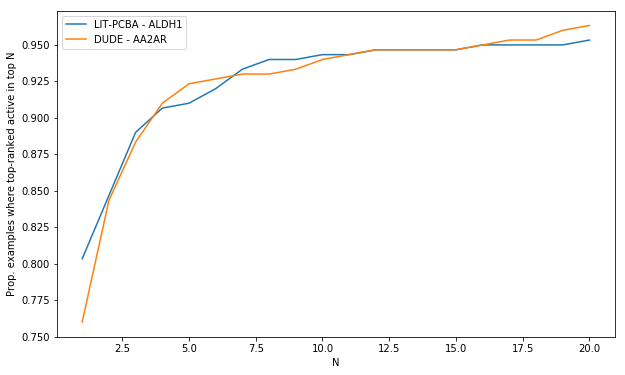

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,21), top_ranked_cumulative_aldh1, label = 'LIT-PCBA - ALDH1')
plt.plot(range(1,21), top_ranked_cumulative_aa2ar, label = 'DUDE - AA2AR')

plt.xlabel('N')
plt.ylabel('Prop. examples where top-ranked active in top N')


plt.legend()
plt.show()

# New pdbbind test set

### PLEC cutoff variation

In [46]:
root_dir = '/data/hookbill/hadfield/syntheticVS/data/pdbbind_small_filtered_test_set'
ZINC_scores = {}
suffixes = ['25', '3', '35', '4', '45', '5', '55', '6']

for suffix in suffixes:
    print(f'Suffix: {suffix}')
    ZINC_scores[f'{suffix}'] = process_attribution_scores(f'{root_dir}/attributions_dir_{suffix}')


mean_attribution_scores_ZINC = [ZINC_scores[f'{suffix}'][0] for suffix in suffixes]


Suffix: 25
Suffix: 3
Suffix: 35
Suffix: 4
Suffix: 45
Suffix: 5
Suffix: 55
Suffix: 6


In [5]:
print([round(x, 3) for x in mean_attribution_scores_ZINC])

[0.566, 0.654, 0.773, 0.885, 0.859, 0.778, 0.733, 0.697]


In [19]:
def process_attribution_scores_split(path_to_attribution_dir, one = True):
    
    all_df_paths = glob.glob(f'{path_to_attribution_dir}/df*.csv')
    
    all_dfs = []
    for p in all_df_paths:
        df = pd.read_csv(p, sep = ' ')
        
        if one:
            if df['binding'].sum() == 1:
                all_dfs.append(df)
        else:
            if df['binding'].sum() > 1:
                all_dfs.append(df)
    print(len(all_dfs))
    
    all_attribution_scores = [compute_attribution_auc(df) for df in all_dfs]
    #top_ranked = get_histogram_list(all_dfs)
    
    #top_ranked_cumulative = []


    #for i in range(1, 21):
        #top_ranked_cumulative.append(sum(pd.Series(top_ranked) <= i)/len(top_ranked))

    return np.mean(all_attribution_scores)#, all_attribution_scores, top_ranked, top_ranked_cumulative


In [20]:
root_dir = '/data/hookbill/hadfield/syntheticVS/data/pdbbind_small_filtered_test_set'
ZINC_scores_one = {}
ZINC_scores_gt_one = {}
suffixes = ['25', '3', '35', '4', '45', '5', '55', '6']

for suffix in suffixes:
    print(f'Suffix: {suffix}')
    ZINC_scores_one[f'{suffix}'] = process_attribution_scores_split(f'{root_dir}/attributions_dir_{suffix}', one=True)
    ZINC_scores_gt_one[f'{suffix}'] = process_attribution_scores_split(f'{root_dir}/attributions_dir_{suffix}', one = False)

    
mean_attribution_scores_ZINC_one = [ZINC_scores_one[f'{suffix}'] for suffix in suffixes]
mean_attribution_scores_ZINC_gt_one = [ZINC_scores_gt_one[f'{suffix}']for suffix in suffixes]


Suffix: 25
302
194
Suffix: 3
302
195
Suffix: 35
302
195
Suffix: 4
302
195
Suffix: 45
302
195
Suffix: 5
302
195
Suffix: 55
302
195
Suffix: 6
302
195


In [21]:
mean_attribution_scores_ZINC

[0.565597795542111,
 0.6540134660811241,
 0.7726245863511804,
 0.8853072887520014,
 0.8592642074291168,
 0.7784007521179819,
 0.7326608272295272,
 0.6972486544798071]

In [22]:
mean_attribution_scores_ZINC_one

[0.5681872807623923,
 0.6640046546348553,
 0.8188224585547317,
 0.9504680299891997,
 0.9214492575442973,
 0.8149809678104075,
 0.7507260569486162,
 0.7181571147239723]

In [23]:
mean_attribution_scores_ZINC_gt_one

[0.5615667412301264,
 0.6385399330389356,
 0.7010771124769621,
 0.7843916792461869,
 0.7629571041738118,
 0.7217483155071482,
 0.7046828817158611,
 0.6648673468196129]

In [79]:
target = 'AA2AR'

attribution_dir=f'/data/hookbill/hadfield/syntheticVS/data/pdbbind_small_filtered_test_set/attributions_dir_DUDE_{target}_45/'
morgan_results_loc = f'/data/hookbill/hadfield/syntheticVS/data/DUDE_{target}_50ops_ac0025_t4_processed/morgan_performance.txt'
plec_results_loc = f'/data/hookbill/hadfield/syntheticVS/data/DUDE_{target}_50ops_ac0025_t4_processed/plec_performance.txt'

In [33]:
with open(morgan_results_loc, 'r') as f:
    morgan_results_str = f.readlines()
    
with open(plec_results_loc, 'r') as f:
    plec_results_str = f.readlines()

def str_to_dict(results_str):

    out_dict = {}
    out_dict['Accuracy'] = float(results_str[0].split(': ')[1].split('\n')[0])
    out_dict['ROC AUC'] = float(results_str[1].split(': ')[1].split('\n')[0])
    out_dict['Logarithmic Loss'] = float(results_str[2].split(': ')[1].split('\n')[0])

    return out_dict
    


In [34]:
morgan_results_dict = str_to_dict(morgan_results_str)
plec_results_dict = str_to_dict(plec_results_str)

In [80]:
attribution_scores = process_attribution_scores(attribution_dir)

In [81]:
attribution_scores[0]

0.7571934715707216

In [44]:
DUDE_results = {}
for target in ['AA2AR', 'DRD3', 'FA10', 'MK14', 'VGFR2']:

    DUDE_results[target] = {}
    
    for pc in ['4', '45', '5']:
        
        attribution_dir=f'/data/hookbill/hadfield/syntheticVS/data/pdbbind_small_filtered_test_set/attributions_dir_DUDE_{target}_{pc}/'
        DUDE_results[target][pc] = process_attribution_scores(attribution_dir)
    
    
LIT_results = {}
for target in ['ALDH1', 'FEN1', 'MAPK1', 'PKM2', 'VDR']:

    LIT_results[target] = {}
    
    for pc in ['4', '45', '5']:
        
        attribution_dir=f'/data/hookbill/hadfield/syntheticVS/data/pdbbind_small_filtered_test_set/attributions_dir_LIT_{target}_{pc}/'
        LIT_results[target][pc] = process_attribution_scores(attribution_dir)
    

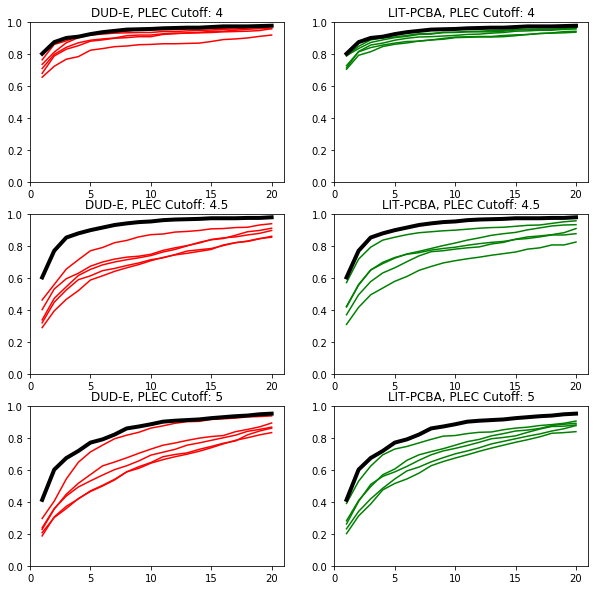

In [50]:
color_vec = ['b', 'g', 'r', 'c', 'm']
color_dict = {0:'red', 1:'green'}
dataset_names = ['DUD-E', 'LIT-PCBA']
plec_cutoffs = [4, 4.5, 5]

fig, ax = plt.subplots(3, 2, figsize = (10, 10))


for idx, r in enumerate([DUDE_results, LIT_results]):
    for jdx, s in enumerate(['4', '45', '5']):
        
        for kdx, target in enumerate(sorted(r.keys())):
            ax[jdx, idx].plot(range(1, 21), r[target][s][3], label = f'{target}', color = color_dict[idx])
        
        ax[jdx, idx].plot(range(1,21), ZINC_scores[s][3], label = 'ZINC (Unbiased)', color = 'black', linewidth = 4)
        
        #ax[jdx, idx].legend(loc = 'lower right')
        ax[jdx, idx].title.set_text(f'{dataset_names[idx]}, PLEC Cutoff: {plec_cutoffs[jdx]}')
        ax[jdx, idx].set_xlim((0, 21))
        ax[jdx, idx].set_ylim((0, 1))
        
        
plt.savefig('/data/hookbill/hadfield/syntheticVS/figures_for_paper/bias_plec_thresholds_monochrome.png')

In [109]:
for idx, r in enumerate([DUDE_results, LIT_results]):
    for jdx, s in enumerate(['4', '45', '5']):
        for kdx, target in enumerate(sorted(r.keys())):
            print (dataset_names[idx], target, plec_cutoffs[jdx], round(np.mean(r[target][s][0]), 3))
            
    
for jdx, s in enumerate(['4', '45', '5']):
    print('ZINC', plec_cutoffs[jdx], round(np.mean(ZINC_scores[s][0]), 3))

DUD-E AA2AR 4 0.863
DUD-E DRD3 4 0.829
DUD-E FA10 4 0.858
DUD-E MK14 4 0.824
DUD-E VGFR2 4 0.772
DUD-E AA2AR 4.5 0.757
DUD-E DRD3 4.5 0.676
DUD-E FA10 4.5 0.673
DUD-E MK14 4.5 0.632
DUD-E VGFR2 4.5 0.616
DUD-E AA2AR 5 0.733
DUD-E DRD3 5 0.628
DUD-E FA10 5 0.555
DUD-E MK14 5 0.605
DUD-E VGFR2 5 0.559
LIT-PCBA ALDH1 4 0.855
LIT-PCBA FEN1 4 0.826
LIT-PCBA MAPK1 4 0.806
LIT-PCBA PKM2 4 0.807
LIT-PCBA VDR 4 0.849
LIT-PCBA ALDH1 4.5 0.813
LIT-PCBA FEN1 4.5 0.687
LIT-PCBA MAPK1 4.5 0.609
LIT-PCBA PKM2 4.5 0.734
LIT-PCBA VDR 4.5 0.71
LIT-PCBA ALDH1 5 0.731
LIT-PCBA FEN1 5 0.623
LIT-PCBA MAPK1 5 0.591
LIT-PCBA PKM2 5 0.665
LIT-PCBA VDR 5 0.647
ZINC 4 0.885
ZINC 4.5 0.859
ZINC 5 0.778


In [113]:
def process_attribution_scores_random(path_to_attribution_dir):
    
    all_dfs = glob.glob(f'{path_to_attribution_dir}/df*.csv')
    all_attribution_scores = [compute_attribution_auc(pd.read_csv(df_loc, sep = ' '), random = True) for df_loc in all_dfs]
    top_ranked = get_histogram_list(all_dfs)
    
    top_ranked_cumulative = []


    for i in range(1, 21):
        top_ranked_cumulative.append(sum(pd.Series(top_ranked) <= i)/len(top_ranked))

    return np.mean(all_attribution_scores), all_attribution_scores, top_ranked, top_ranked_cumulative


In [122]:
attribution_dir=f'/data/hookbill/hadfield/syntheticVS/data/pdbbind_small_filtered_test_set/attributions_dir_4/'
random_results = process_attribution_scores_random(attribution_dir)

In [123]:
np.mean(random_results[0])

0.5033590907774045

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(20,10))

#DUDE

ax[0, 0].plot(range(1,21), DUDE_scores_balance_test['AA2AR_imbalanced'][3], label = 'AA2AR_imbalanced', color = 'orange')  
ax[0, 0].plot(range(1,21), DUDE_scores_balance_test['AA2AR_balanced'][3], label = 'AA2AR_balanced', color = 'blue')
ax[0, 0].legend(loc="lower right")

ax[0, 1].plot(range(1,21), DUDE_scores_balance_test['DRD3_imbalanced'][3], label = 'DRD3_imbalanced', color = 'orange') 
ax[0, 1].plot(range(1,21), DUDE_scores_balance_test['DRD3_balanced'][3], label = 'DRD3_balanced', color = 'blue') 
ax[0, 1].legend(loc="lower right")

ax[0, 2].plot(range(1,21), DUDE_scores_balance_test['FA10_imbalanced'][3], label = 'FA10_imbalanced', color = 'orange') 
ax[0, 2].plot(range(1,21), DUDE_scores_balance_test['FA10_balanced'][3], label = 'FA10_balanced', color = 'blue')
ax[0, 2].legend(loc="lower right")

ax[0, 3].plot(range(1,21), DUDE_scores_balance_test['MK14_imbalanced'][3], label = 'MK14_imbalanced', color = 'orange') 
ax[0, 3].plot(range(1,21), DUDE_scores_balance_test['MK14_balanced'][3], label = 'MK14_balanced', color = 'blue')
ax[0, 3].legend(loc="lower right")

ax[0, 4].plot(range(1,21), DUDE_scores_balance_test['VGFR2_imbalanced'][3], label = 'VGFR2_imbalanced', color = 'orange') 
ax[0, 4].plot(range(1,21), DUDE_scores_balance_test['VGFR2_balanced'][3], label = 'VGFR2_balanced', color = 'blue') 
ax[0, 4].legend(loc="lower right")

#LIT_PCBA

ax[1, 0].plot(range(1,21), LIT_scores_balance_test['ALDH1_imbalanced'][3], label = 'ALDH1_imbalanced', color = 'orange')  
ax[1, 0].plot(range(1,21), LIT_scores_balance_test['ALDH1_balanced'][3], label = 'ALDH1_balanced', color = 'blue')
ax[1, 0].legend(loc="lower right")

ax[1, 1].plot(range(1,21), LIT_scores_balance_test['FEN1_imbalanced'][3], label = 'FEN1_imbalanced', color = 'orange') 
ax[1, 1].plot(range(1,21), LIT_scores_balance_test['FEN1_balanced'][3], label = 'FEN1_balanced', color = 'blue') 
ax[1, 1].legend(loc="lower right")

ax[1, 2].plot(range(1,21), LIT_scores_balance_test['MAPK1_imbalanced'][3], label = 'MAPK1_imbalanced', color = 'orange') 
ax[1, 2].plot(range(1,21), LIT_scores_balance_test['MAPK1_balanced'][3], label = 'MAPK1_balanced', color = 'blue')
ax[1, 2].legend(loc="lower right")

ax[1, 3].plot(range(1,21), LIT_scores_balance_test['PKM2_imbalanced'][3], label = 'PKM2_imbalanced', color = 'orange') 
ax[1, 3].plot(range(1,21), LIT_scores_balance_test['PKM2_balanced'][3], label = 'PKM2_balanced', color = 'blue')
ax[1, 3].legend(loc="lower right")

ax[1, 4].plot(range(1,21), LIT_scores_balance_test['VDR_imbalanced'][3], label = 'VDR_imbalanced', color = 'orange') 
ax[1, 4].plot(range(1,21), LIT_scores_balance_test['VDR_balanced'][3], label = 'VDR_balanced', color = 'blue') 
ax[1, 4].legend(loc="lower right")

plt.show()

In [62]:
from sklearn.metrics import average_precision_score, precision_recall_curve

In [67]:
for target in ['AA2AR', 'DRD3', 'FA10', 'MK14', 'VGFR2']:
    true_labels = np.loadtxt(f'/data/hookbill/hadfield/syntheticVS/data/DUDE_{target}_50ops_ac0025_t4_processed/test_labels_true.txt')
    labels_pred = np.loadtxt(f'/data/hookbill/hadfield/syntheticVS/data/DUDE_{target}_50ops_ac0025_t4_processed/morgan_test_labels_pred.txt')
    labels_prob = np.loadtxt(f'/data/hookbill/hadfield/syntheticVS/data/DUDE_{target}_50ops_ac0025_t4_processed/morgan_test_labels_prob.txt')
    print(target, average_precision_score(true_labels, labels_prob), max([true_labels.mean(), 1-true_labels.mean()]))

AA2AR 1.0 0.9319999999999999
DRD3 0.9999999999999998 0.972
FA10 1.0 0.97
MK14 1.0 0.976
VGFR2 1.0 0.984


In [71]:
for target in ['ALDH1', 'FEN1', 'MAPK1', 'PKM2', 'VDR']:
    true_labels = np.loadtxt(f'/data/hookbill/hadfield/syntheticVS/data/LIT_{target}_50ops_ac0025_t4_processed/test_labels_true.txt')
    labels_pred = np.loadtxt(f'/data/hookbill/hadfield/syntheticVS/data/LIT_{target}_50ops_ac0025_t4_processed/morgan_test_labels_pred.txt')
    labels_prob = np.loadtxt(f'/data/hookbill/hadfield/syntheticVS/data/LIT_{target}_50ops_ac0025_t4_processed/morgan_test_labels_prob.txt')
    print(target, round(average_precision_score(true_labels, labels_prob), 3), max([true_labels.mean(), 1-true_labels.mean()]))

ALDH1 0.809 0.6127744510978044
FEN1 0.584 0.956
MAPK1 0.292 0.964
PKM2 0.755 0.944
VDR 0.6 0.928


In [60]:
true_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

(array([492.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   7.]),
 array([0.    , 0.0976, 0.1952, 0.2928, 0.3904, 0.488 , 0.5856, 0.6832,
        0.7808, 0.8784, 0.976 ]),
 <a list of 10 Patch objects>)

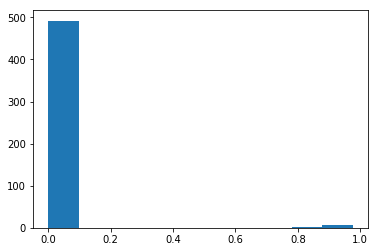

In [68]:
plt.hist(labels_prob)

In [72]:
true_labels = np.loadtxt(f'/data/hookbill/hadfield/syntheticVS/data/zinc_50ops_ac0025_t4_processed/test_labels_true.txt')
labels_pred = np.loadtxt(f'/data/hookbill/hadfield/syntheticVS/data/zinc_50ops_ac0025_t4_processed/morgan_test_labels_pred.txt')
labels_prob = np.loadtxt(f'/data/hookbill/hadfield/syntheticVS/data/zinc_50ops_ac0025_t4_processed/morgan_test_labels_prob.txt')

In [73]:
    print(round(average_precision_score(true_labels, labels_prob), 3), max([true_labels.mean(), 1-true_labels.mean()]))

VDR 0.53 0.504


In [75]:
true_labels.mean()

0.504

In [36]:
noise_levels = ['0', '001', '002', '005', '01', '025', '05']
plec_cutoffs = ['25', '3', '35', '4', '45', '5', '55', '6']

In [37]:
auc_matrix = []
for pc in plec_cutoffs:
    
    auc_pc = []
    
    for nl in noise_levels:
        
        if nl == '0':
            attribution_dir = f'/data/hookbill/hadfield/syntheticVS/data/pdbbind_small_filtered_test_set/attributions_dir_{pc}/'
    
        else:
            attribution_dir = f'/data/hookbill/hadfield/syntheticVS/data/pdbbind_small_filtered_test_set/attributions_dir_{pc}_{nl}/'

        #Compute attribution scores
        attr_scores = process_attribution_scores(attribution_dir)
        auc_pc.append(np.mean(attr_scores[0]))
    
    auc_matrix.append(auc_pc)
    
auc_matrix = np.array(auc_matrix)

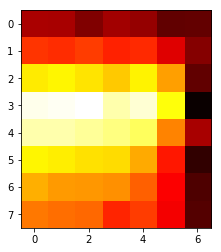

In [130]:
plt.imshow(auc_matrix, cmap='hot', interpolation='nearest')
plt.show()

In [131]:
print(auc_matrix)

[[0.5655978  0.56385048 0.53903695 0.56072923 0.55137034 0.51836375
  0.5198842 ]
 [0.65401347 0.64839429 0.65900295 0.64222914 0.64741292 0.60028161
  0.54163343]
 [0.77262459 0.77959101 0.76713495 0.75101397 0.77654399 0.72295074
  0.51881499]
 [0.88530729 0.88915824 0.89505319 0.85835496 0.87505064 0.78867648
  0.46143337]
 [0.85926421 0.8585233  0.84941256 0.84078694 0.82479434 0.7039147
  0.56386028]
 [0.77840075 0.77446793 0.76591381 0.76151614 0.73074596 0.63469264
  0.48807621]
 [0.73266083 0.71909969 0.71725032 0.71281251 0.68175549 0.61859763
  0.50678536]
 [0.69724865 0.69110329 0.68774775 0.64278272 0.6587157  0.61346299
  0.51045346]]


In [168]:
print(auc_matrix.shape)

(8, 7)


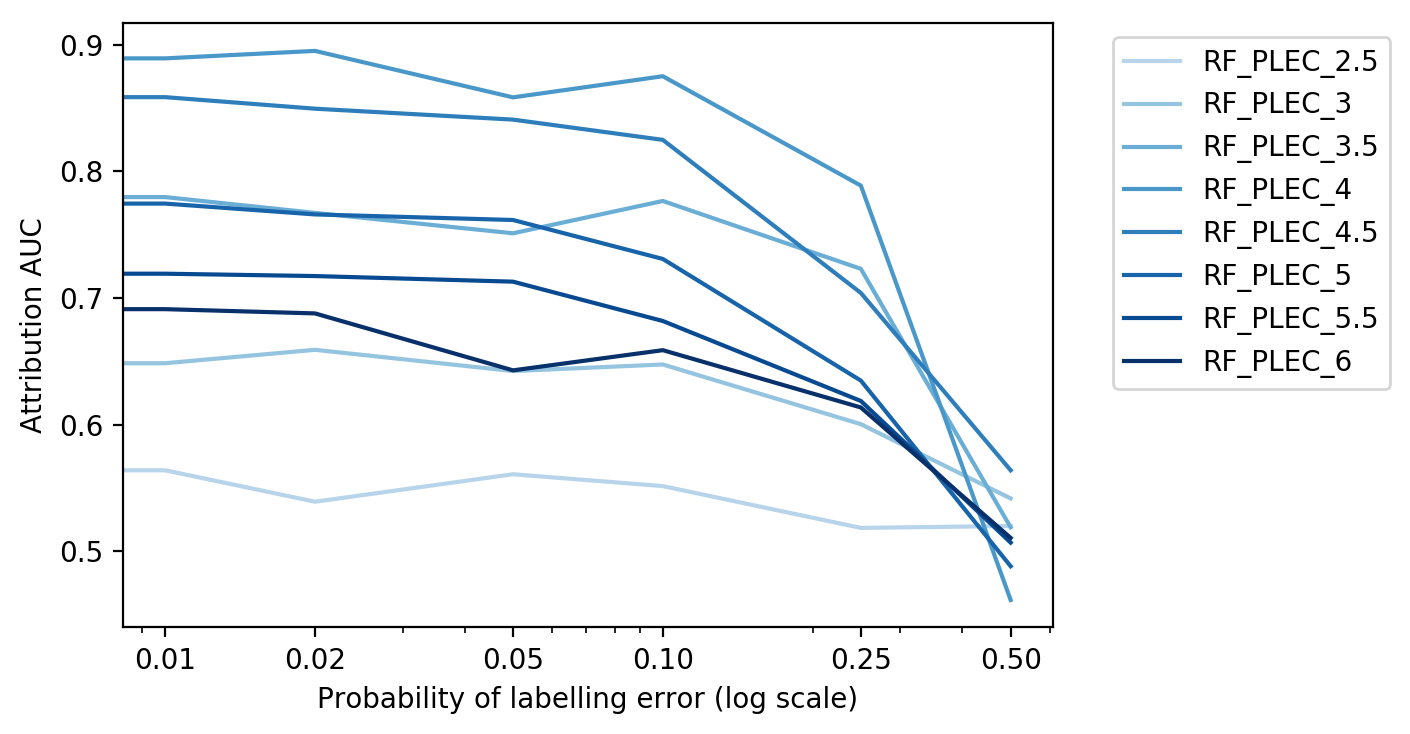

In [43]:
import matplotlib as mpl
c = np.arange(1, 12)

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap.set_array([])

#noise_levels_float = ['0', '0.01', '0.02', '0.05', '0.1', '0.25', '0.5']
noise_levels_float = [0, 0.01, 0.02, 0.05, 0.1, 0.25, 0.5]
plec_cutoffs_float = [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]

fig, ax = plt.subplots(1,1, dpi = 200)
for idx in range(auc_matrix.shape[0]):
    ax.plot(noise_levels_float, auc_matrix[idx], label = f'RF_PLEC_{plec_cutoffs_float[idx]}', color = cmap.to_rgba(idx + 4))
    
ax.set_xscale('log')

ax.set_xticks(noise_levels_float[1:])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
#plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1))

plt.xlabel('Probability of labelling error (log scale)')
plt.ylabel('Attribution AUC')
plt.savefig('/data/hookbill/hadfield/syntheticVS/figures_for_paper/noise_attribution_auc_2.png', bbox_inches='tight')
plt.show()

In [4]:
import yaml
def load_yaml(fname):
    
    with open(fname, 'r') as f:
        y = yaml.load(f, Loader=yaml.Loader)
        
    for k in y.keys():
        y[k] = pd.DataFrame(y[k])
        y[k].columns = ['x', 'y', 'z', 'atomic_num', 'atom_type', 'lig', 'attrbution', 'binding']
        
    return y
    

In [5]:


for dataset in ['DUDE_AA2AR', 'DUDE_FA10', 'DUDE_DRD3', 'DUDE_MK14', 'DUDE_VGFR2', 'LIT_ALDH1', 'LIT_FEN1', 'LIT_MAPK1', 'LIT_PKM2', 'LIT_VDR']:
    
    dfs = load_yaml(f'/data/hookbill/hadfield/syntheticVS/data/pdbbind_small_filtered_test_set/biased_masking_dfs/attribution_df_Masking_{dataset}.yaml')
    
    attributions = [compute_attribution_auc(df) for df in dfs.values()]
    
    print(dataset, round(np.mean(attributions), 3))
    
    


DUDE_AA2AR 0.838
DUDE_FA10 0.816
DUDE_DRD3 0.691
DUDE_MK14 0.73
DUDE_VGFR2 0.605
LIT_ALDH1 0.925
LIT_FEN1 0.868
LIT_MAPK1 0.698
LIT_PKM2 0.82
LIT_VDR 0.882


In [181]:
dfs = load_yaml('/data/hookbill/hadfield/syntheticVS/data/pdbbind_small_filtered_test_set/attribution_df_Masking_ZINC.yaml')
attributions = [compute_attribution_auc(df) for df in dfs.values()]    
print('ZINC', round(np.mean(attributions), 3))



ZINC 0.851


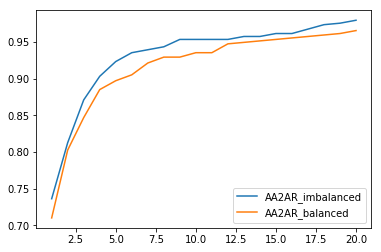

In [14]:
targets_DUDE = ['AA2AR', 'DRD3', 'FA10', 'MK14', 'VGFR2']
pcs = ['4', '45', '5']
root_dir = '/data/hookbill/hadfield/syntheticVS/data/pdbbind_small_filtered_test_set'


DUDE_scores_balance_test = {}
for target in targets_DUDE:
    for pc in pcs: 
        DUDE_scores_balance_test[f'{target}_{pc}_imbalanced'] = process_attribution_scores(f'{root_dir}/attributions_dir_DUDE_{target}_{pc}')
        DUDE_scores_balance_test[f'{target}_{pc}_balanced'] = process_attribution_scores(f'{root_dir}/attributions_dir_DUDE_{target}_{pc}_balanced')
    
plt.plot(range(1,21), DUDE_scores_balance_test['AA2AR_4_imbalanced'][3], label = 'AA2AR_imbalanced')
plt.plot(range(1,21), DUDE_scores_balance_test['AA2AR_4_balanced'][3], label = 'AA2AR_balanced')

plt.legend()


In [15]:
targets_LIT = ['ALDH1', 'FEN1', 'MAPK1', 'PKM2', 'VDR']
root_dir = '/data/hookbill/hadfield/syntheticVS/data/pdbbind_small_filtered_test_set'

LIT_scores_balance_test = {}
for target in targets_LIT:
    for pc in pcs: 
        LIT_scores_balance_test[f'{target}_{pc}_imbalanced'] = process_attribution_scores(f'{root_dir}/attributions_dir_LIT_{target}_{pc}')
        LIT_scores_balance_test[f'{target}_{pc}_balanced'] = process_attribution_scores(f'{root_dir}/attributions_dir_LIT_{target}_{pc}_balanced')



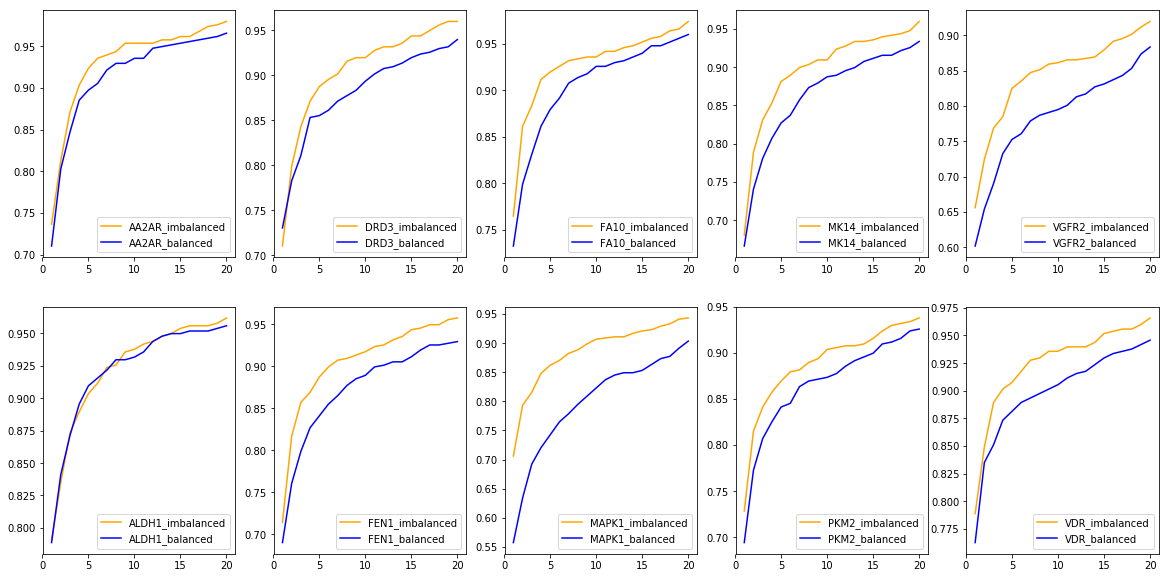

In [21]:
fig, ax = plt.subplots(2, 5, figsize=(20,10))

#DUDE

ax[0, 0].plot(range(1,21), DUDE_scores_balance_test['AA2AR_4_imbalanced'][3], label = 'AA2AR_imbalanced', color = 'orange')  
ax[0, 0].plot(range(1,21), DUDE_scores_balance_test['AA2AR_4_balanced'][3], label = 'AA2AR_balanced', color = 'blue')
ax[0, 0].legend(loc="lower right")

ax[0, 1].plot(range(1,21), DUDE_scores_balance_test['DRD3_4_imbalanced'][3], label = 'DRD3_imbalanced', color = 'orange') 
ax[0, 1].plot(range(1,21), DUDE_scores_balance_test['DRD3_4_balanced'][3], label = 'DRD3_balanced', color = 'blue') 
ax[0, 1].legend(loc="lower right")

ax[0, 2].plot(range(1,21), DUDE_scores_balance_test['FA10_4_imbalanced'][3], label = 'FA10_imbalanced', color = 'orange') 
ax[0, 2].plot(range(1,21), DUDE_scores_balance_test['FA10_4_balanced'][3], label = 'FA10_balanced', color = 'blue')
ax[0, 2].legend(loc="lower right")

ax[0, 3].plot(range(1,21), DUDE_scores_balance_test['MK14_4_imbalanced'][3], label = 'MK14_imbalanced', color = 'orange') 
ax[0, 3].plot(range(1,21), DUDE_scores_balance_test['MK14_4_balanced'][3], label = 'MK14_balanced', color = 'blue')
ax[0, 3].legend(loc="lower right")

ax[0, 4].plot(range(1,21), DUDE_scores_balance_test['VGFR2_4_imbalanced'][3], label = 'VGFR2_imbalanced', color = 'orange') 
ax[0, 4].plot(range(1,21), DUDE_scores_balance_test['VGFR2_4_balanced'][3], label = 'VGFR2_balanced', color = 'blue') 
ax[0, 4].legend(loc="lower right")

#LIT_PCBA

ax[1, 0].plot(range(1,21), LIT_scores_balance_test['ALDH1_4_imbalanced'][3], label = 'ALDH1_imbalanced', color = 'orange')  
ax[1, 0].plot(range(1,21), LIT_scores_balance_test['ALDH1_4_balanced'][3], label = 'ALDH1_balanced', color = 'blue')
ax[1, 0].legend(loc="lower right")

ax[1, 1].plot(range(1,21), LIT_scores_balance_test['FEN1_4_imbalanced'][3], label = 'FEN1_imbalanced', color = 'orange') 
ax[1, 1].plot(range(1,21), LIT_scores_balance_test['FEN1_4_balanced'][3], label = 'FEN1_balanced', color = 'blue') 
ax[1, 1].legend(loc="lower right")

ax[1, 2].plot(range(1,21), LIT_scores_balance_test['MAPK1_4_imbalanced'][3], label = 'MAPK1_imbalanced', color = 'orange') 
ax[1, 2].plot(range(1,21), LIT_scores_balance_test['MAPK1_4_balanced'][3], label = 'MAPK1_balanced', color = 'blue')
ax[1, 2].legend(loc="lower right")

ax[1, 3].plot(range(1,21), LIT_scores_balance_test['PKM2_4_imbalanced'][3], label = 'PKM2_imbalanced', color = 'orange') 
ax[1, 3].plot(range(1,21), LIT_scores_balance_test['PKM2_4_balanced'][3], label = 'PKM2_balanced', color = 'blue')
ax[1, 3].legend(loc="lower right")

ax[1, 4].plot(range(1,21), LIT_scores_balance_test['VDR_4_imbalanced'][3], label = 'VDR_imbalanced', color = 'orange') 
ax[1, 4].plot(range(1,21), LIT_scores_balance_test['VDR_4_balanced'][3], label = 'VDR_balanced', color = 'blue') 
ax[1, 4].legend(loc="lower right")

plt.savefig('/data/hookbill/hadfield/syntheticVS/figures_for_paper/class_imbalance_4.png')

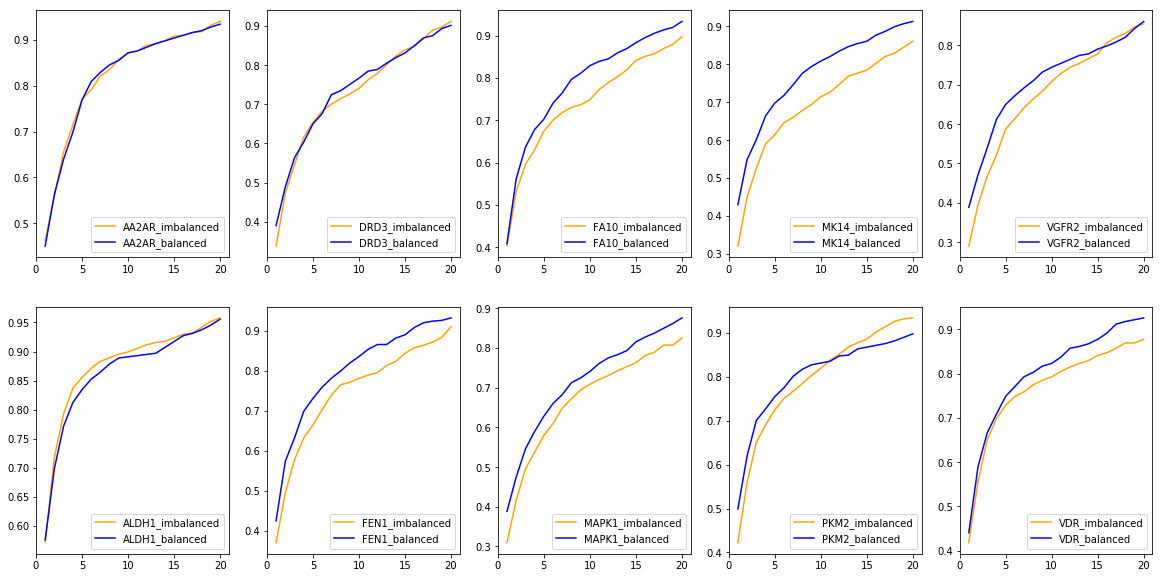

In [22]:
fig, ax = plt.subplots(2, 5, figsize=(20,10))

#DUDE

ax[0, 0].plot(range(1,21), DUDE_scores_balance_test['AA2AR_45_imbalanced'][3], label = 'AA2AR_imbalanced', color = 'orange')  
ax[0, 0].plot(range(1,21), DUDE_scores_balance_test['AA2AR_45_balanced'][3], label = 'AA2AR_balanced', color = 'blue')
ax[0, 0].legend(loc="lower right")

ax[0, 1].plot(range(1,21), DUDE_scores_balance_test['DRD3_45_imbalanced'][3], label = 'DRD3_imbalanced', color = 'orange') 
ax[0, 1].plot(range(1,21), DUDE_scores_balance_test['DRD3_45_balanced'][3], label = 'DRD3_balanced', color = 'blue') 
ax[0, 1].legend(loc="lower right")

ax[0, 2].plot(range(1,21), DUDE_scores_balance_test['FA10_45_imbalanced'][3], label = 'FA10_imbalanced', color = 'orange') 
ax[0, 2].plot(range(1,21), DUDE_scores_balance_test['FA10_45_balanced'][3], label = 'FA10_balanced', color = 'blue')
ax[0, 2].legend(loc="lower right")

ax[0, 3].plot(range(1,21), DUDE_scores_balance_test['MK14_45_imbalanced'][3], label = 'MK14_imbalanced', color = 'orange') 
ax[0, 3].plot(range(1,21), DUDE_scores_balance_test['MK14_45_balanced'][3], label = 'MK14_balanced', color = 'blue')
ax[0, 3].legend(loc="lower right")

ax[0, 4].plot(range(1,21), DUDE_scores_balance_test['VGFR2_45_imbalanced'][3], label = 'VGFR2_imbalanced', color = 'orange') 
ax[0, 4].plot(range(1,21), DUDE_scores_balance_test['VGFR2_45_balanced'][3], label = 'VGFR2_balanced', color = 'blue') 
ax[0, 4].legend(loc="lower right")

#LIT_PCBA

ax[1, 0].plot(range(1,21), LIT_scores_balance_test['ALDH1_45_imbalanced'][3], label = 'ALDH1_imbalanced', color = 'orange')  
ax[1, 0].plot(range(1,21), LIT_scores_balance_test['ALDH1_45_balanced'][3], label = 'ALDH1_balanced', color = 'blue')
ax[1, 0].legend(loc="lower right")

ax[1, 1].plot(range(1,21), LIT_scores_balance_test['FEN1_45_imbalanced'][3], label = 'FEN1_imbalanced', color = 'orange') 
ax[1, 1].plot(range(1,21), LIT_scores_balance_test['FEN1_45_balanced'][3], label = 'FEN1_balanced', color = 'blue') 
ax[1, 1].legend(loc="lower right")

ax[1, 2].plot(range(1,21), LIT_scores_balance_test['MAPK1_45_imbalanced'][3], label = 'MAPK1_imbalanced', color = 'orange') 
ax[1, 2].plot(range(1,21), LIT_scores_balance_test['MAPK1_45_balanced'][3], label = 'MAPK1_balanced', color = 'blue')
ax[1, 2].legend(loc="lower right")

ax[1, 3].plot(range(1,21), LIT_scores_balance_test['PKM2_45_imbalanced'][3], label = 'PKM2_imbalanced', color = 'orange') 
ax[1, 3].plot(range(1,21), LIT_scores_balance_test['PKM2_45_balanced'][3], label = 'PKM2_balanced', color = 'blue')
ax[1, 3].legend(loc="lower right")

ax[1, 4].plot(range(1,21), LIT_scores_balance_test['VDR_45_imbalanced'][3], label = 'VDR_imbalanced', color = 'orange') 
ax[1, 4].plot(range(1,21), LIT_scores_balance_test['VDR_45_balanced'][3], label = 'VDR_balanced', color = 'blue') 
ax[1, 4].legend(loc="lower right")

plt.savefig('/data/hookbill/hadfield/syntheticVS/figures_for_paper/class_imbalance_45.png')

AttributeError: 'silent_list' object has no attribute 'set_fontsize'

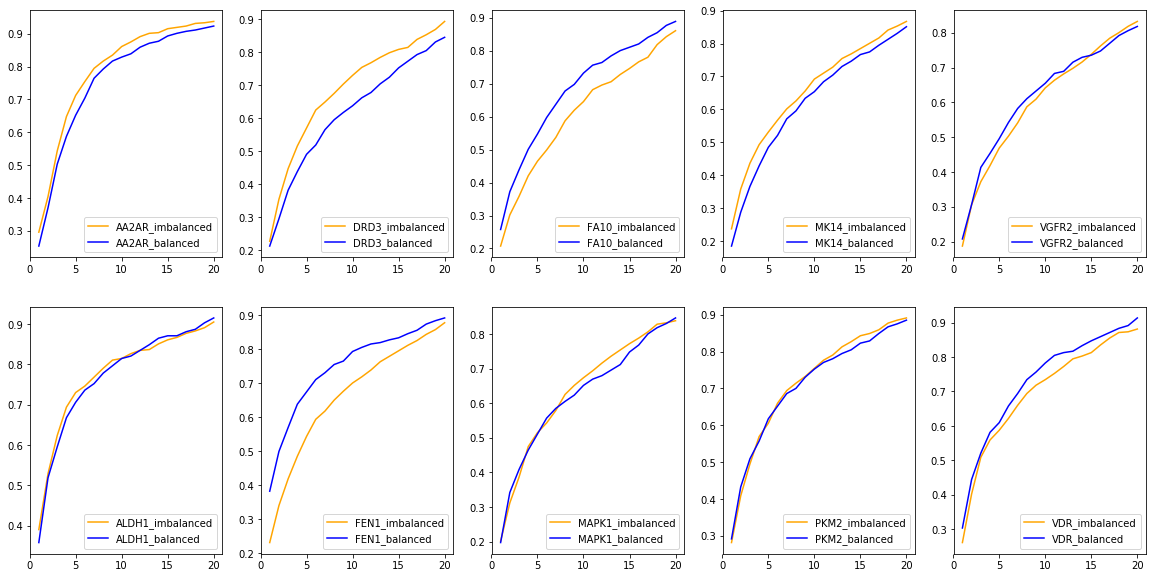

In [30]:
fig, ax = plt.subplots(2, 5, figsize=(20,10))

#DUDE

ax[0, 0].plot(range(1,21), DUDE_scores_balance_test['AA2AR_5_imbalanced'][3], label = 'AA2AR_imbalanced', color = 'orange')  
ax[0, 0].plot(range(1,21), DUDE_scores_balance_test['AA2AR_5_balanced'][3], label = 'AA2AR_balanced', color = 'blue')
ax[0, 0].legend(loc="lower right")

ax[0, 1].plot(range(1,21), DUDE_scores_balance_test['DRD3_5_imbalanced'][3], label = 'DRD3_imbalanced', color = 'orange') 
ax[0, 1].plot(range(1,21), DUDE_scores_balance_test['DRD3_5_balanced'][3], label = 'DRD3_balanced', color = 'blue') 
ax[0, 1].legend(loc="lower right")

ax[0, 2].plot(range(1,21), DUDE_scores_balance_test['FA10_5_imbalanced'][3], label = 'FA10_imbalanced', color = 'orange') 
ax[0, 2].plot(range(1,21), DUDE_scores_balance_test['FA10_5_balanced'][3], label = 'FA10_balanced', color = 'blue')
ax[0, 2].legend(loc="lower right")

ax[0, 3].plot(range(1,21), DUDE_scores_balance_test['MK14_5_imbalanced'][3], label = 'MK14_imbalanced', color = 'orange') 
ax[0, 3].plot(range(1,21), DUDE_scores_balance_test['MK14_5_balanced'][3], label = 'MK14_balanced', color = 'blue')
ax[0, 3].legend(loc="lower right")

ax[0, 4].plot(range(1,21), DUDE_scores_balance_test['VGFR2_5_imbalanced'][3], label = 'VGFR2_imbalanced', color = 'orange') 
ax[0, 4].plot(range(1,21), DUDE_scores_balance_test['VGFR2_5_balanced'][3], label = 'VGFR2_balanced', color = 'blue') 
ax[0, 4].legend(loc="lower right")

#LIT_PCBA

ax[1, 0].plot(range(1,21), LIT_scores_balance_test['ALDH1_5_imbalanced'][3], label = 'ALDH1_imbalanced', color = 'orange')  
ax[1, 0].plot(range(1,21), LIT_scores_balance_test['ALDH1_5_balanced'][3], label = 'ALDH1_balanced', color = 'blue')
ax[1, 0].legend(loc="lower right")

ax[1, 1].plot(range(1,21), LIT_scores_balance_test['FEN1_5_imbalanced'][3], label = 'FEN1_imbalanced', color = 'orange') 
ax[1, 1].plot(range(1,21), LIT_scores_balance_test['FEN1_5_balanced'][3], label = 'FEN1_balanced', color = 'blue') 
ax[1, 1].legend(loc="lower right")

ax[1, 2].plot(range(1,21), LIT_scores_balance_test['MAPK1_5_imbalanced'][3], label = 'MAPK1_imbalanced', color = 'orange') 
ax[1, 2].plot(range(1,21), LIT_scores_balance_test['MAPK1_5_balanced'][3], label = 'MAPK1_balanced', color = 'blue')
ax[1, 2].legend(loc="lower right")

ax[1, 3].plot(range(1,21), LIT_scores_balance_test['PKM2_5_imbalanced'][3], label = 'PKM2_imbalanced', color = 'orange') 
ax[1, 3].plot(range(1,21), LIT_scores_balance_test['PKM2_5_balanced'][3], label = 'PKM2_balanced', color = 'blue')
ax[1, 3].legend(loc="lower right")

ax[1, 4].plot(range(1,21), LIT_scores_balance_test['VDR_5_imbalanced'][3], label = 'VDR_imbalanced', color = 'orange') 
ax[1, 4].plot(range(1,21), LIT_scores_balance_test['VDR_5_balanced'][3], label = 'VDR_balanced', color = 'blue') 
ax[1, 4].legend(loc="lower right")

ax[1,4].get_xticklabels().set_fontsize(20)
#plt.savefig('/data/hookbill/hadfield/syntheticVS/figures_for_paper/class_imbalance_5.png')
plt.show()

In [205]:
from rdkit.Chem.FeatMaps import FeatMaps
from rdkit import RDConfig
from rdkit.Chem import ChemicalFeatures
import os
from rdkit import Chem

def getPharmNumbers(mol):
    
    pharms = ['Acceptor', 'Donor', 'Aromatic']
    pharmCounts = {'Acceptor': 0, 'Donor': 0, 'Aromatic': 0}
    
    fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
    factory = ChemicalFeatures.BuildFeatureFactory(fdefName)
    feats = factory.GetFeaturesForMol(mol)
    proc_feats = []
    for feat in feats:
        if feat.GetFamily() in pharms:
            proc_feats.append(feat.GetFamily())
            
            if feat.GetFamily() == 'Donor':
                print(mol.GetAtomWithIdx(feat.GetAtomIds()[0]).GetSymbol())
            
    for p in proc_feats:        
        pharmCounts[p] += 1
    
    return pharmCounts

In [206]:
mol = Chem.MolFromMolFile('/data/hookbill/hadfield/syntheticVS/example_to_perturb_2/lig100173.sdf')

In [207]:
mol.RemoveAllConformers()

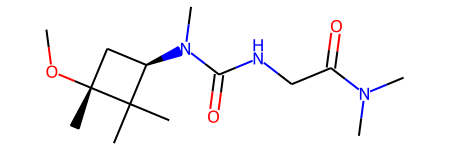

In [208]:
mol

In [209]:
getPharmNumbers(mol)

N
N
N


{'Acceptor': 3, 'Donor': 3, 'Aromatic': 0}

In [195]:
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)
feats = factory.GetFeaturesForMol(mol)

In [196]:
for feat in feats:
    print(feat)

In [204]:
feat.GetAtomIds()

(17,)